In [1]:
import pandas as pd
import numpy as np
import os

os.chdir("..") # set parent dir as root dir

In [2]:
# Paths
DATA_DIR = '/data/raw/'
PROCESSED_DIR = '/data/processed/'
PLOTS_DIR = '/notebooks/plots/'
os.makedirs(PLOTS_DIR, exist_ok=True)
os.makedirs(PROCESSED_DIR, exist_ok=True)

# EDA

### Data load

In [3]:
# download dataset if it does not present

# from src.data_processing.data_load import download_retailrocket
# download_retailrocket()

In [4]:
from src.data_processing.data_load import get_events

# events load
events = get_events()
print(events.head())
print(events.shape)

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
(2756101, 5)


In [5]:
from src.data_processing.data_load import get_item_properties

item_props = get_item_properties()
print(item_props.head())
print(item_props.shape)

       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
(20275902, 4)


In [6]:
from src.data_processing.data_load import get_categories

categories = get_categories()
print(categories.head())

   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0


### Data analysis

In [7]:
print("Events:")
print(events.shape)
print(events.head(), end="\n\n")
print(events.info(), end="\n\n")
print(events.describe(), end="\n\n")
print("Nulls:\n", events.isnull().sum(), end="\n\n")
print("Unique visitors:\n", events["visitorid"].nunique(), end="\n\n")
print("Unique items:\n", events["itemid"].nunique())

Events:
(2756101, 5)
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB
None

          timestamp     visitorid        itemid  transactionid
count  2.756101e+06  2.756101e+06  2.756101e+06   22457.000000
mean   1.436424e+12  7.019229e+05  2.349225e+05    8826.497796
std    3.366312e+09  4.056875e+05  1.341954e+05    5098.996290
min   

In [8]:
print("Item properties:", end="\n\n")
print(item_props.head(), end="\n\n")
print(item_props.shape, end="\n\n")
print(item_props.info(), end="\n\n")
print("Unique properties:\n", item_props["property"].nunique())
print("Unique items in properties:\n", item_props["itemid"].nunique())

Item properties:

       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513

(20275902, 4)

<class 'pandas.core.frame.DataFrame'>
Index: 20275902 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 773.5+ MB
None

Unique properties:
 1104
Unique items in properties:
 417053


In [9]:
print("Categories:")
print(categories.head(), end="\n\n")
print(categories.shape)

Categories:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0

(1669, 2)


Lets convert timestamp to pandas datetime format and extract useful info (e.g. day of the week, hour, etc)

In [10]:
events["datetime"] = pd.to_datetime(events["timestamp"], unit="ms")
events["date"] = events["datetime"].dt.date
events["day_of_week"] = events["datetime"].dt.dayofweek
events["hour"] = events["datetime"].dt.hour

In [11]:
item_props["datetime"] = pd.to_datetime(item_props["timestamp"], unit="ms")
item_props = item_props.sort_values(["itemid", "timestamp"])

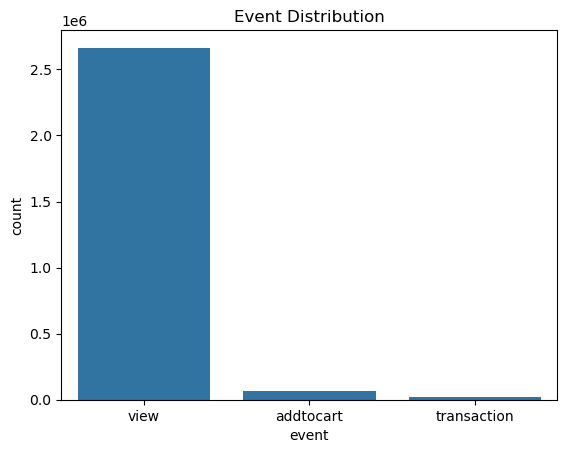

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='event', data=events)
plt.title('Event Distribution')
plt.savefig(os.path.join(PLOTS_DIR, 'event_distribution.png'))
plt.show()

In [13]:
views = events[events['event'] == 'view'].shape[0]
carts = events[events['event'] == 'addtocart'].shape[0]
transactions = events[events['event'] == 'transaction'].shape[0]
print(f"Conversion view to cart: {carts / views * 100:.2f}%")
print(f"Conversion cart to transaction: {transactions / carts * 100:.2f}%")

Conversion view to cart: 2.60%
Conversion cart to transaction: 32.39%


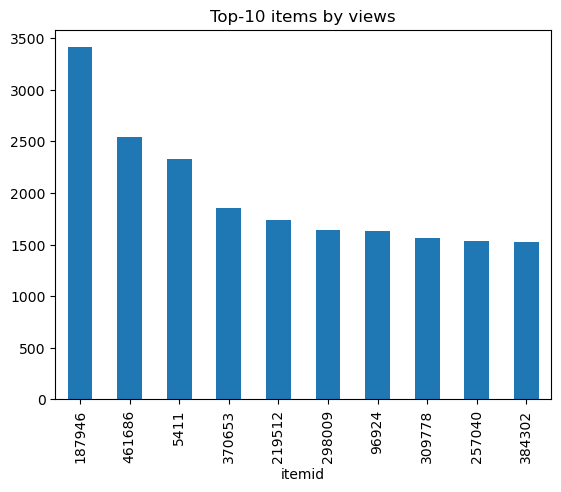

In [15]:
top_views = events[events['event'] == 'view']['itemid'].value_counts().head(10)
top_views.plot(kind='bar')
plt.title('Top-10 items by views')
plt.savefig(os.path.join(PLOTS_DIR, 'top_views.png'))
plt.show()

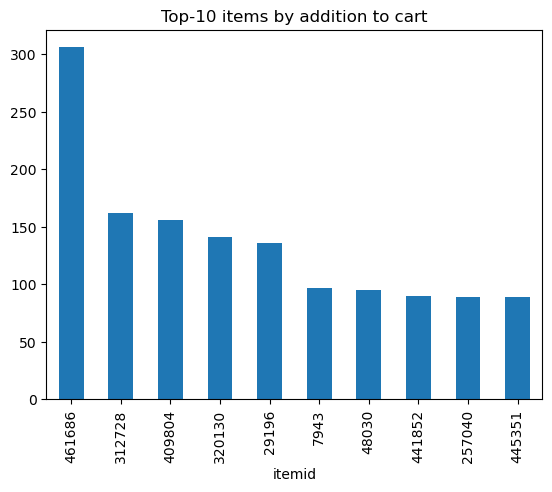

In [16]:
top_views = events[events['event'] == 'addtocart']['itemid'].value_counts().head(10)
top_views.plot(kind='bar')
plt.title('Top-10 items by addition to cart')
plt.savefig(os.path.join(PLOTS_DIR, 'top_carts.png'))
plt.show()

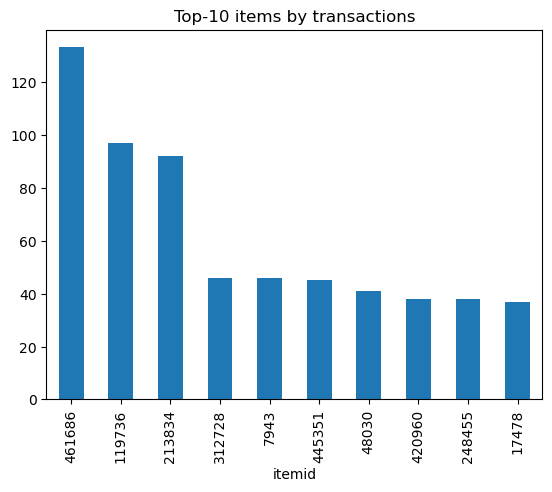

In [17]:
top_views = events[events['event'] == 'transaction']['itemid'].value_counts().head(10)
top_views.plot(kind='bar')
plt.title('Top-10 items by transactions')
plt.savefig(os.path.join(PLOTS_DIR, 'top_transactions.png'))
plt.show()

Проведём временной анализ

In [19]:
hourly_events = events.groupby(['hour', 'event']).size().reset_index(name='count')
daily_events = events.groupby(['day_of_week', 'event']).size().reset_index(name='count')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


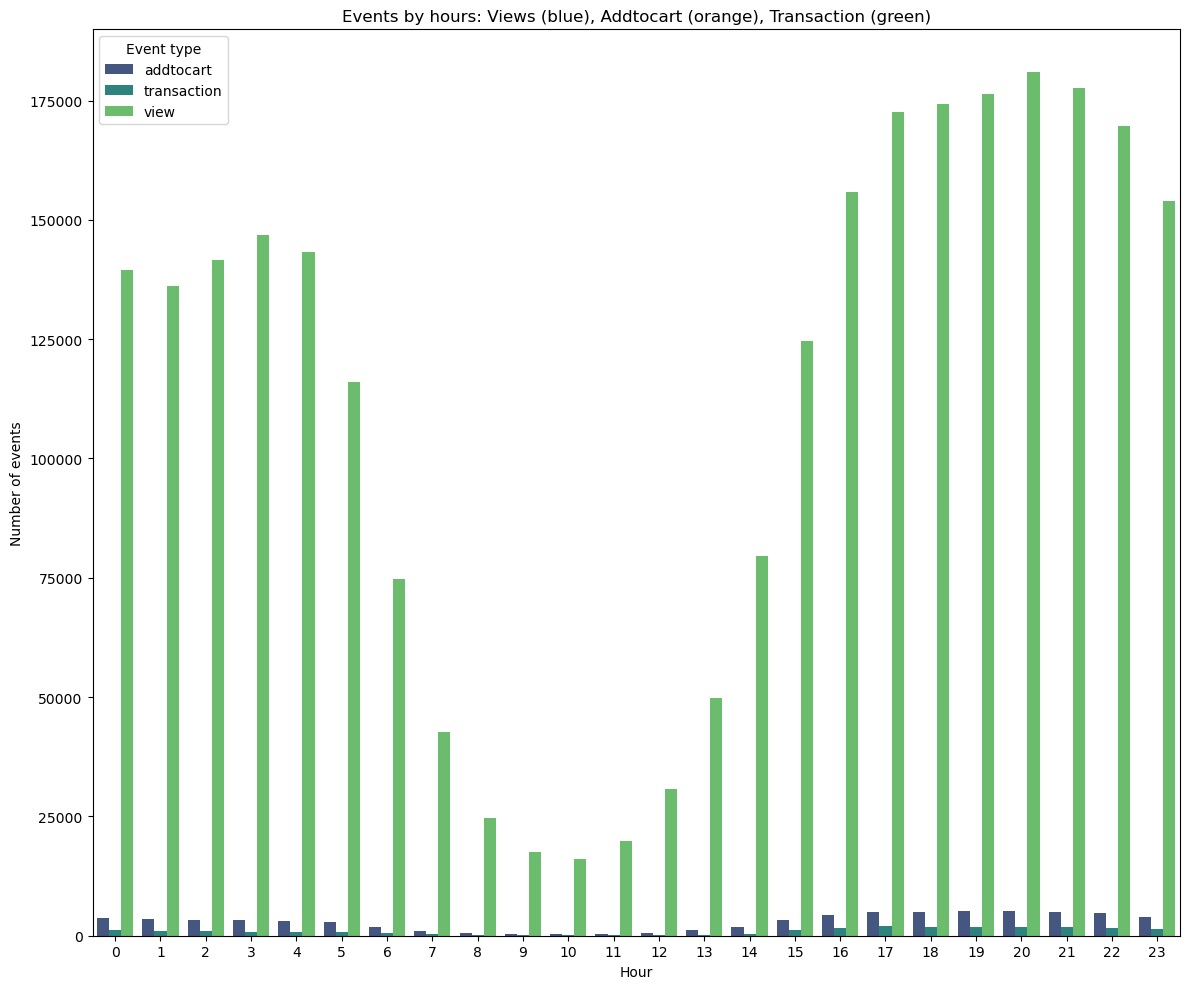

In [21]:
plt.figure(figsize=(12, 10))
sns.barplot(data=hourly_events, x='hour', y='count', hue='event', palette='viridis')
plt.title('Events by hours: Views (blue), Addtocart (orange), Transaction (green)')
plt.xlabel('Hour')
plt.ylabel('Number of events')
plt.legend(title='Event type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'events_by_hour_grouped.png'), dpi=300, bbox_inches='tight')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


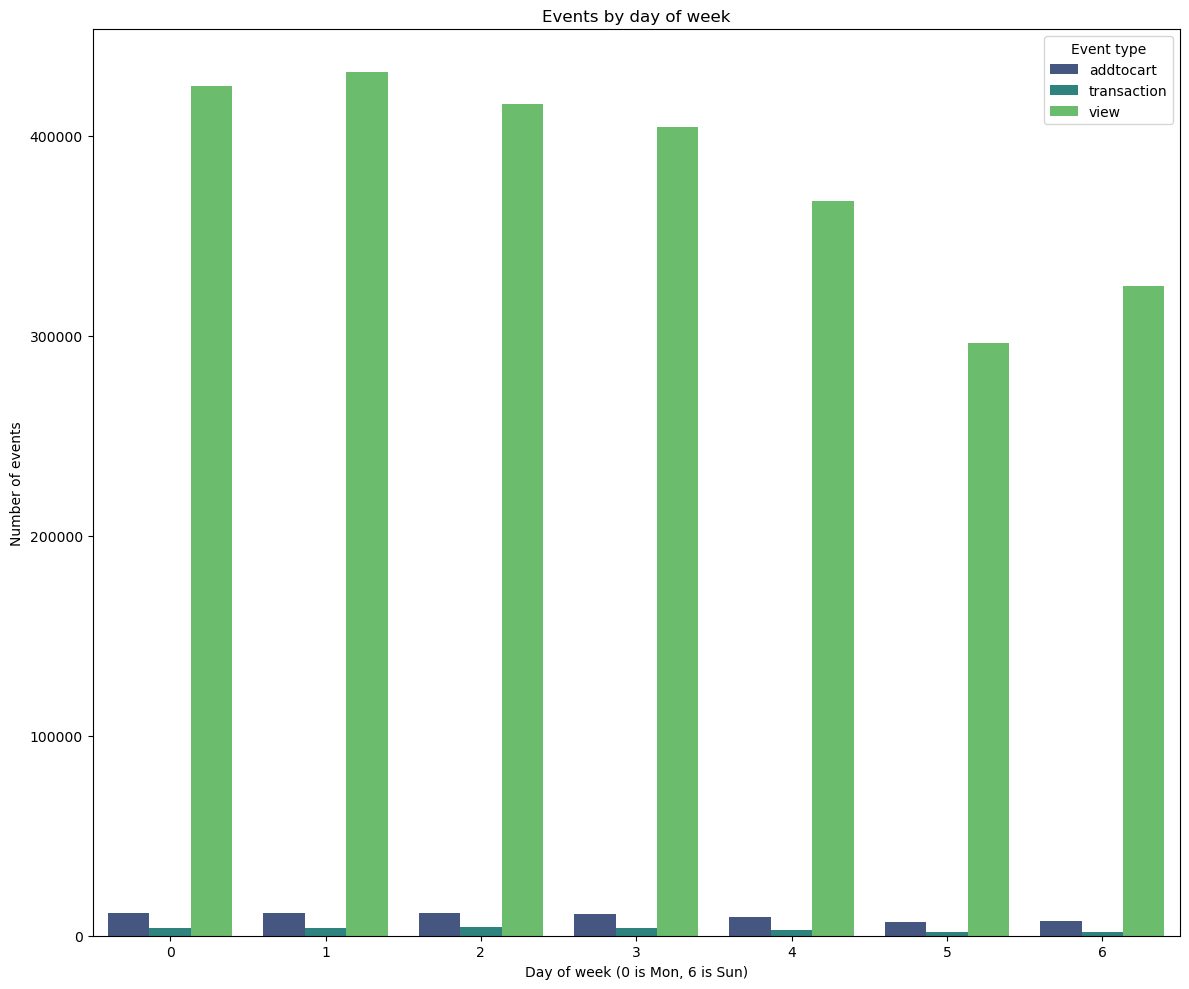

In [22]:
plt.figure(figsize=(12, 10))
sns.barplot(data=daily_events, x='day_of_week', y='count', hue='event', palette='viridis')
plt.title('Events by day of week')
plt.xlabel('Day of week (0 is Mon, 6 is Sun)')
plt.ylabel('Number of events')
plt.legend(title='Event type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'events_by_day_grouped.png'), dpi=300, bbox_inches='tight')
plt.show()

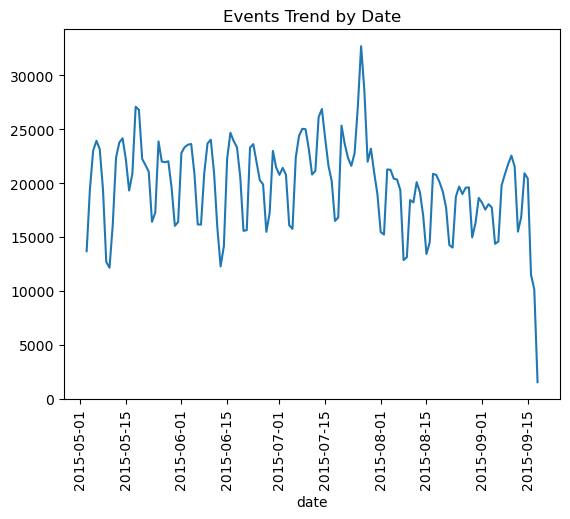

In [24]:
events.groupby('date').size().plot()
plt.title('Events Trend by Date')
plt.xticks(rotation=90)
plt.savefig(os.path.join(PLOTS_DIR, 'events_trend.png'))
plt.show()

Теперь посмотрим не только зависимость категорий от времени, но и конверсии

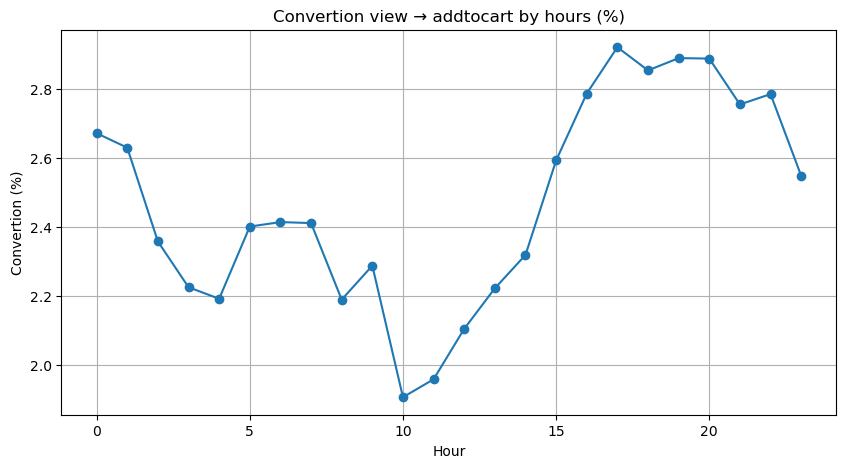

In [ ]:
# views → addtocart convertion by hours
conversion_hourly = events[events['event'].isin(['view', 'addtocart'])].groupby(['hour', 'event']).size().reset_index(name='count')
conv_pivot = conversion_hourly.pivot(index='hour', columns='event', values='count').fillna(0)
conv_pivot['conversion_rate'] = (conv_pivot['addtocart'] / conv_pivot['view']) * 100
conv_pivot['conversion_rate'].plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Convertion view → addtocart by hours (%)')
plt.xlabel('Hour')
plt.ylabel('Convertion (%)')
plt.grid(True)
plt.savefig(os.path.join(PLOTS_DIR, 'conversion_by_hour.png'), dpi=300, bbox_inches='tight')
plt.show()

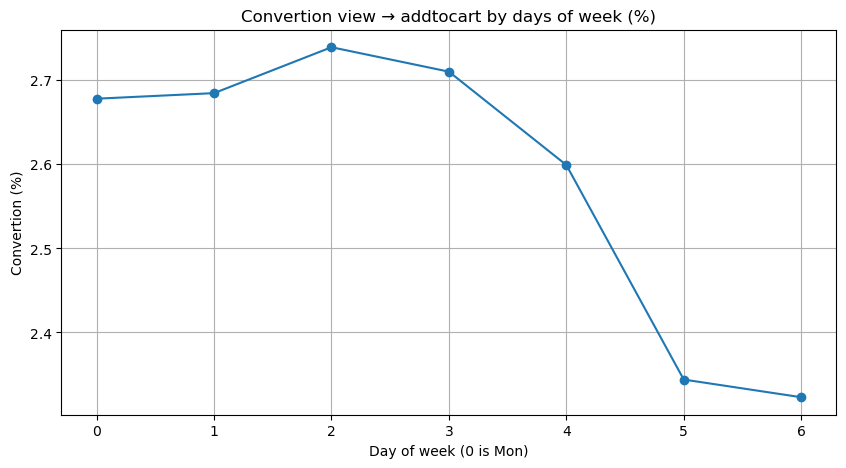

In [42]:
# views → addtocart convertion by day of week
conv_daily = events[events['event'].isin(['view', 'addtocart'])].groupby(['day_of_week', 'event']).size().reset_index(name='count')
conv_daily_pivot = conv_daily.pivot(index='day_of_week', columns='event', values='count').fillna(0)
conv_daily_pivot['conversion_rate'] = (conv_daily_pivot['addtocart'] / conv_daily_pivot['view']) * 100
conv_daily_pivot['conversion_rate'].plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Convertion view → addtocart by days of week (%)')
plt.xlabel('Day of week (0 is Mon)')
plt.ylabel('Convertion (%)')
plt.grid(True)
plt.savefig(os.path.join(PLOTS_DIR, 'conversion_by_day.png'), dpi=300, bbox_inches='tight')
plt.show()

Выводы из анализа статистик вместе с временем: 
+ Наибольшое число просмотров достигается в будни. Также в будни больше конверсия из просмотра в добавление в коризну. 
+ В выходные как конверсия из просмотра в добавление в коризну, так и число просмотров падает примерно на 10-20%. 
+ В течение дня больше всего действий ночью и вечером. Причём соотношение действий почти не меняется с изменением времени дня. Днём действий намного меньше (падение до -87% в самой низкой точке в 12 часов дня), к вечеру значения восстанавливаются и становятся даже выше, чем ночью (в среднем на 16%).
+ Конверсия из просмотра в добавление в корзину аналогично уменьшается к середине дня, но раньше (к 10 часам), а затем начинает расти.  

### User and items analysis

count    1.407580e+06
mean     1.958042e+00
std      1.258049e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.757000e+03
dtype: float64


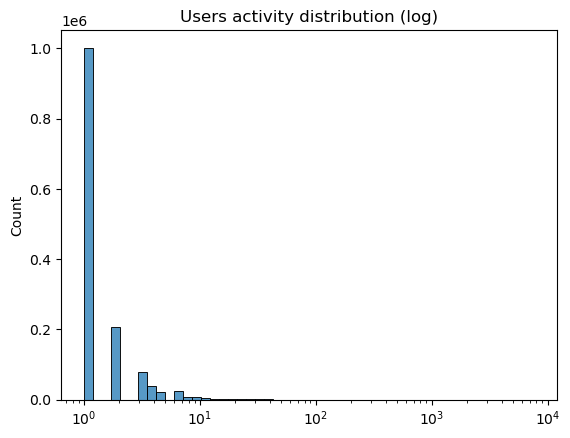

In [27]:
user_activity = events.groupby('visitorid').size().sort_values(ascending=False)
print(user_activity.describe())
sns.histplot(user_activity, bins=50, log_scale=True)
plt.title('Users activity distribution (log)')
plt.savefig(os.path.join(PLOTS_DIR, 'user_activity.png'))
plt.show()

In [28]:
ACTIVITY_THRESHOLD = 1

In [29]:
user_activity_types = events.groupby('visitorid')['event'].value_counts().unstack(fill_value=0)
user_activity_types['total_activity'] = user_activity_types.sum(axis=1)
user_activity_types = user_activity_types.sort_values('total_activity', ascending=False)

Юзеры, у которых всего 1 (или другое очень малое количество) просмотр добавляют шум в наши данные, раздувая к тому же матрицу user-item, не давая при этом сигналов для обучения. Посмотрим, сколько таких, и почистим данные.

In [32]:
active_users_mask = user_activity_types['total_activity'] > ACTIVITY_THRESHOLD
active_users = user_activity_types[active_users_mask].index
print(f"Total users: {events['visitorid'].nunique()}")
print(f"Active users (>{ACTIVITY_THRESHOLD} events): {len(active_users)} ({len(active_users)/events['visitorid'].nunique()*100:.1f}%)")

Total users: 1407580
Active users (>1 events): 406020 (28.8%)


То же самое сделаем для item'ов

count    235061.000000
mean         11.725046
std          37.032101
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max        3412.000000
dtype: float64


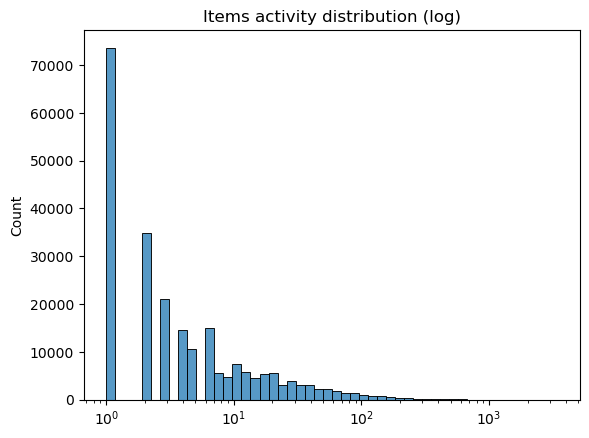

In [34]:
item_activity = events.groupby('itemid').size().sort_values(ascending=False)
print(item_activity.describe())
sns.histplot(item_activity, bins=50, log_scale=True)
plt.title('Items activity distribution (log)')
plt.savefig(os.path.join(PLOTS_DIR, 'item_activity.png'))
plt.show()

In [35]:
item_activity_types = events.groupby('itemid')['event'].value_counts().unstack(fill_value=0)
item_activity_types['total_activity'] = item_activity_types.sum(axis=1)
item_activity_types = item_activity_types.sort_values('total_activity', ascending=False)

In [36]:
active_items_mask = item_activity_types['total_activity'] > ACTIVITY_THRESHOLD
active_items = item_activity_types[active_items_mask].index
print(f"Total items: {events['itemid'].nunique()}")
print(f"Active items (>{ACTIVITY_THRESHOLD} events): {len(active_items)} ({len(active_items)/events['itemid'].nunique()*100:.1f}%)")

Total items: 235061
Active items (>1 events): 161452 (68.7%)


In [37]:
events_filtered = events[events['visitorid'].isin(active_users) & events['itemid'].isin(active_items)]
print(f"Removed events: {len(events) - len(events_filtered)} ({(len(events) - len(events_filtered))/len(events)*100:.1f}%)")

Removed events: 1029926 (37.4%)


In [39]:
# Sparsity: before and after the filtration
def calculate_sparsity(events_df):
    n_u = events_df['visitorid'].nunique()
    n_i = events_df['itemid'].nunique()
    n_interactions = len(events_df)
    if n_u == 0 or n_i == 0: return np.nan, np.nan
    sparsity = (1 - n_interactions / (n_u * n_i)) * 100
    density = 100 - sparsity
    return sparsity, density

In [41]:
original_sparsity, original_density = calculate_sparsity(events)
filtered_sparsity, filtered_density = calculate_sparsity(events_filtered)
density_improvement = filtered_density - original_density
print("Before filtration:")
print(f"Users: {events['visitorid'].nunique()}, Items: {events['itemid'].nunique()}, Interactions: {len(events)}")
print(f"Sparsity: {original_sparsity:.6f}%, Density: {original_density:.6f}%")

Before filtration:
Users: 1407580, Items: 235061, Interactions: 2756101
Sparsity: 99.999167%, Density: 0.000833%


In [43]:
print("After filtration:")
print(f"Users: {events_filtered['visitorid'].nunique()}, Items: {events_filtered['itemid'].nunique()}, Interactions: {len(events_filtered)}")
print(f"Sparsity: {filtered_sparsity:.6f}%, Density: {filtered_density:.6f}%")
print(f"Density improvement: {density_improvement:.6f}% (relative gain: {density_improvement / original_density * 100:.2f}%)")

After filtration:
Users: 404977, Items: 138387, Interactions: 1726175
Sparsity: 99.996920%, Density: 0.003080%
Density improvement: 0.002247% (relative gain: 269.76%)


In [47]:
cumulative_interactions_filtered = events_filtered.groupby('itemid').size().sort_values(ascending=False).cumsum() / len(events_filtered)
pareto_80_filtered = (cumulative_interactions_filtered >= 0.8).idxmin()
print(f"Pareto on filtered: Top {pareto_80_filtered} items account for ~80% interactions")

Pareto on filtered: Top 461686 items account for ~80% interactions


### Item Properties Analysis

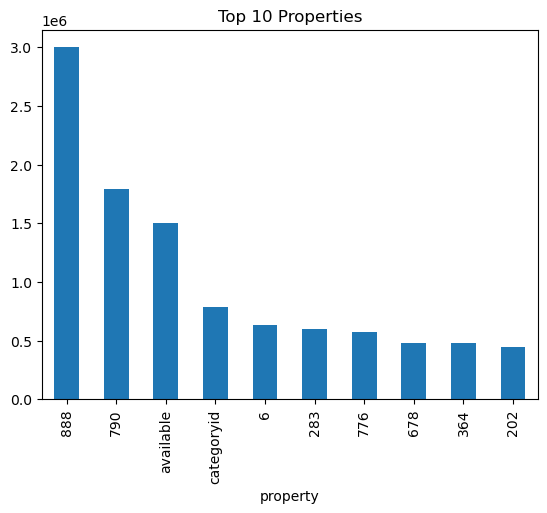

In [48]:
top_props = item_props['property'].value_counts().head(10)
top_props.plot(kind='bar')
plt.title('Top 10 Properties')
plt.savefig(os.path.join(PLOTS_DIR, 'top_properties.png'))
plt.show()

In [49]:
prop_changes = item_props.groupby(['itemid', 'property'])['value'].nunique().reset_index(name='changes')
changing_props = prop_changes[prop_changes['changes'] > 1]
print(f"Total unique properties: {item_props['property'].nunique()}")
print(f"Properties that change over time: {changing_props['property'].nunique()} ({changing_props['property'].nunique() / item_props['property'].nunique() * 100:.1f}%)")
print("Top changing properties:", changing_props['property'].value_counts().head(5).to_dict())

Total unique properties: 1104
Properties that change over time: 301 (27.3%)
Top changing properties: {'888': 152938, '790': 85219, 'available': 67001, 'categoryid': 23352, '451': 15439}


### Categories analysis

In [52]:
print("Root categories:", categories[categories['parentid'].isnull()].shape[0])

Root categories: 25


### Behavior analysis

In [60]:
buyers = events[events['event'] == 'transaction']['visitorid'].unique()
print("Number of buyers:", len(buyers))
events_filtered['is_buyer'] = events_filtered['visitorid'].isin(buyers).astype(int)

Number of buyers: 11719


C:\Users\Yuriy\AppData\Local\Temp\ipykernel_27884\1961644894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_filtered['is_buyer'] = events_filtered['visitorid'].isin(buyers).astype(int)


In [66]:
# RFM: Recency (days since last event), Frequency (total events), "Monetary" (transactions count)
latest_date = events_filtered['datetime'].max()
rfm = events_filtered.groupby('visitorid').agg({
    'datetime': lambda x: (latest_date - x.max()).days,  # Recency
    'event': 'count',  # Frequency
    'transactionid': 'count'  # "Monetary" as transactions
}).rename(columns={'datetime': 'recency', 'event': 'frequency', 'transactionid': 'monetary'})
rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=range(4, 0, -1))
rfm['f_score'] = pd.qcut(rfm['frequency'], 4, labels=range(1, 5), duplicates="drop")
rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 4, labels=range(1, 5))  # Handle zeros
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
print("RFM segments head:")
print(rfm.head())
sns.histplot(rfm['rfm_score'], bins=20)
plt.title('RFM Score Distribution')
plt.savefig(os.path.join(PLOTS_DIR, 'rfm_distribution.png'))
plt.show()

ValueError: Bin labels must be one fewer than the number of bin edges

In [70]:
# RFM calculation (fixed monetary agg: sum notnull, not count rows)
latest_date = events_filtered['datetime'].max()
rfm = events_filtered.groupby('visitorid').agg({
    'datetime': lambda x: (latest_date - x.max()).days,  # Recency
    'event': 'count',  # Frequency
    'transactionid': lambda x: x.notnull().sum()  # Monetary: count actual transactions (non-NaN)
}).rename(columns={'datetime': 'recency', 'event': 'frequency', 'transactionid': 'monetary'})

print("RFM describe (for bin selection):")
print(rfm.describe())

print("\nFrequency value counts (check skew):")
print(rfm['frequency'].value_counts().head(10))

# Fixed bins with pd.cut (stable for skew/duplicates)
# Recency: Lower better, bins from quantiles, reverse scores
recency_bins = [-np.inf] + list(rfm['recency'].quantile([0.25, 0.5, 0.75])) + [np.inf]
rfm['r_score'] = pd.cut(rfm['recency'], bins=recency_bins, labels=range(4, 0, -1), include_lowest=True)

# Frequency: Higher better, bins adjusted for low values (e.g., min-3,3-5,5-10,max)
frequency_bins = [rfm['frequency'].min() - 1, 3, 5, 10, rfm['frequency'].max() + 1]  # Custom: low=2-3, med=4-5, high=6-10, very high>10
rfm['f_score'] = pd.cut(rfm['frequency'], bins=frequency_bins, labels=range(1, 5), include_lowest=True)

# Monetary: Higher better, bins for 0-1+ (many 0)
monetary_bins = [-np.inf, 0, 1, np.inf]  # 1: non-buyers=0, 2:1 buy, 3:2- med, 4: high
print(monetary_bins)
rfm['m_score'] = pd.cut(rfm['monetary'], bins=monetary_bins, labels=range(1, 4), include_lowest=True)

# Handle NaN if any (e.g., if all monetary=0, bins adjust)
rfm = rfm.fillna(1)  # Default low score

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
print("RFM segments head:")
print(rfm.head())

print("F_score distribution:")
print(rfm['f_score'].value_counts())

RFM describe (for bin selection):
             recency      frequency       monetary
count  404977.000000  404977.000000  404977.000000
mean       66.286066       4.262403       0.055277
std        39.279718      22.958502       1.539339
min         0.000000       1.000000       0.000000
25%        32.000000       2.000000       0.000000
50%        65.000000       2.000000       0.000000
75%       100.000000       4.000000       0.000000
max       137.000000    7723.000000     559.000000

Frequency value counts (check skew):
frequency
2     200912
3      77943
4      38017
5      22571
6      13932
7       9323
1       7889
8       6672
9       4822
10      3637
Name: count, dtype: int64
[-inf, 0, 1, inf]
RFM segments head:
           recency  frequency  monetary r_score f_score m_score rfm_score
visitorid                                                                
0                6          3         0       4       1       1       411
2               41          8         0     

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


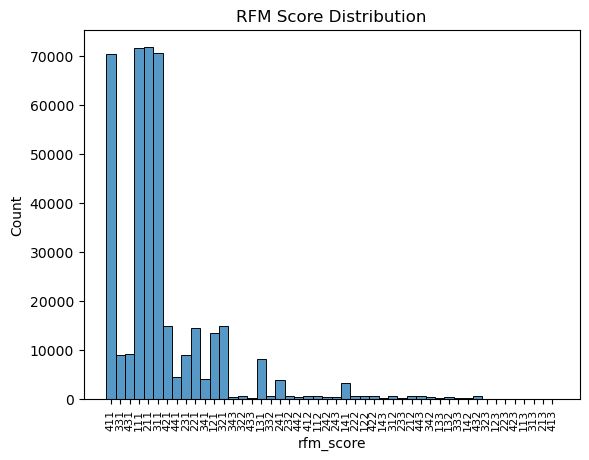

RFM Insights:
- High-RFM users (e.g., 444): 0 — focus recommendations here.
- Low-frequency majority: 85.8% users — potential for uplift campaigns.


In [73]:
sns.histplot(rfm['rfm_score'], bins=20)
plt.title('RFM Score Distribution')
plt.xticks(rotation=90, fontsize=8)
plt.savefig(os.path.join(PLOTS_DIR, 'rfm_distribution.png'))
plt.show()

# Insights
print("RFM Insights:")
print(f"- High-RFM users (e.g., 444): {len(rfm[rfm['rfm_score'] == '444'])} — focus recommendations here.")
print(f"- Low-frequency majority: {len(rfm[rfm['f_score'] <= 2]) / len(rfm) * 100:.1f}% users — potential for uplift campaigns.")